ML Course, Bogotá, Colombia  (&copy; Josh Bloom; June 2019)

In [1]:
%run ../talktools.py

# Featurization and Pipelining

<img src="imgs/workflow.png">
Source: [V. Singh](https://www.slideshare.net/hortonworks/data-science-workshop)

<img src="imgs/feature.png">
Source: Lightsidelabs

<img src="imgs/feature2.png">

# Featurization Examples


# Categorical & Missing Features


Often times, we might be presented with features that look like:

| eye color | height | country of origin | gender |
| ------------| ---------| ---------------------| ------- |
|  brown    |  1.85    |  Colombia           |     M    |
|  brown    |  1.25    |  USA                   |            |
|  blonde   |  1.45    |  Mexico               |     F     |
|  red         |  2.01    |  Mexico               |     F     |
|                |             |  Chile                   |     F     |
|  Brown   |  1.02    |  Colombia           |             |  

What do you notice in this dataset? 

Since many ML learn algorithms require, as we'll see, a full matrix of numerical input features, there's often times a lot of preprocessing work that is needed before we can learn.

In [66]:
import pandas as pd
df = pd.DataFrame({"eye color": ["brown", "brown", "blonde", "red", None, "Brown"],
  "height": [1.85, 1.25, 1.45, 2.01, None, 1.02],
  "country of origin": ["Colombia", "USA", "Mexico", "Mexico", "Chile", "Colombia"],
  "gender": ["M", None, "F", "F","F", None]})
df

,country of origin,eye color,gender,height
0,Colombia,brown,M,1.85
1,USA,brown,None,1.25
2,Mexico,blonde,F,1.45
3,Mexico,red,F,2.01
4,Chile,None,F,NaN
5,Colombia,Brown,None,1.02


Let's first normalize the data so it's all lower case. This will handle the "Brown" and "brown" issue.

In [68]:
df_new = df.copy()
df_new["eye color"] = df_new["eye color"].str.lower()
df_new

,country of origin,eye color,gender,height
0,Colombia,brown,M,1.85
1,USA,brown,None,1.25
2,Mexico,blonde,F,1.45
3,Mexico,red,F,2.01
4,Chile,None,F,NaN
5,Colombia,brown,None,1.02


Let's next handle the NaN in the height. What should we use here?

In [72]:
# mean of everyone?
np.nanmean(df_new["height"].values)

1.516

In [76]:
# mean of just females?
np.nanmean(df_new[df_new["gender"] == 'F']["height"]) 

1.73

In [87]:
df_new1 = df_new.copy()
df_new1.at[4, "height"] = np.nanmean(df_new[df_new["gender"] == 'F']["height"]) 
df_new1

,country of origin,eye color,gender,height
0,Colombia,brown,M,1.85
1,USA,brown,None,1.25
2,Mexico,blonde,F,1.45
3,Mexico,red,F,2.01
4,Chile,None,F,1.73
5,Colombia,brown,None,1.02


Let's next handle the eye color. What should we use?

In [91]:
df_new1["eye color"].mode()

0    brown
dtype: object

In [92]:
df_new2 = df_new1.copy()
df_new2.at[4, "eye color"] = df_new1["eye color"].mode().values[0]
df_new2

,country of origin,eye color,gender,height
0,Colombia,brown,M,1.85
1,USA,brown,None,1.25
2,Mexico,blonde,F,1.45
3,Mexico,red,F,2.01
4,Chile,brown,F,1.73
5,Colombia,brown,None,1.02


How should we handle the missing gender entries?

In [99]:
df_new3 = df_new2.fillna("N/A")
df_new3

,country of origin,eye color,gender,height
0,Colombia,brown,M,1.85
1,USA,brown,N/A,1.25
2,Mexico,blonde,F,1.45
3,Mexico,red,F,2.01
4,Chile,brown,F,1.73
5,Colombia,brown,N/A,1.02


We're done, right? No. We fixed the dirty, missing data problem but we still dont have a numerical feature matrix.

We could do a mapping such that "Colombia" -> 1, "USA" -> 2, ... etc. but then that would imply an ordering between what is fundamentally categories (without ordering). Instead we want to do `one-hot encoding`, where every unique value gets its own column. `pandas` as a method on DataFrames called `get_dummies` which does this for us.

In [124]:
pd.get_dummies(df_new3, prefix=['country of origin', 'eye color', 'gender'])

,height,country of origin_Chile,country of origin_Colombia,country of origin_Mexico,country of origin_USA,eye color_blonde,eye color_brown,eye color_red,gender_F,gender_M,gender_N/A
0,1.85,0,1,0,0,0,1,0,0,1,0
1,1.25,0,0,0,1,0,1,0,0,0,1
2,1.45,0,0,1,0,1,0,0,1,0,0
3,2.01,0,0,1,0,0,0,1,1,0,0
4,1.73,1,0,0,0,0,1,0,1,0,0
5,1.02,0,1,0,0,0,1,0,0,0,1


Note: depending on the learning algorithm you use, you may want to do `drop_first=True` in `get_dummies`.

Of course there are helpful tools that exist for us to deal with dirty, missing data.

In [119]:
%run transform

In [126]:
bt = BasicTransformer(return_df=True)
bt.fit_transform(df_new)

,height,country of origin_Mexico,country of origin_Colombia,country of origin_Chile,country of origin_USA,eye color_brown,eye color_red,eye color_blonde,gender_F,gender_M
0,0.935272,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.691288,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,-0.149101,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.369021,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.149101,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,-1.314803,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Time series

The [wafer dataset](http://www.timeseriesclassification.com/description.php?Dataset=Wafer) is a set of timeseries capturing sensor measurements (1000 training examples, 6164 test examples) of one silicon wafer during the manufacture of semiconductors. Each wafer has a classification of normal or abnormal. The abnormal wafers are representative of a range of problems commonly encountered during semiconductor manufacturing.

In [1]:
import requests
from io import StringIO
dat_file = requests.get("https://github.com/zygmuntz/time-series-classification/blob/master/data/wafer/Wafer.csv?raw=true")
data = StringIO(dat_file.text)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data.seek(0)
df = pd.read_csv(data, header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,152
0,1.01430,1.0143,1.01430,1.01430,1.01430,1.0143,1.01430,1.01430,1.01430,1.0143,...,1.01430,1.01430,1.014300,1.014300,1.014300,1.014300,1.014300,1.014300,1.01430,1
1,-0.88485,-1.0375,-0.97771,-1.01690,-0.98675,-1.0107,-0.98142,-1.01920,-0.96448,-1.0542,...,-1.00060,-0.99919,-1.002200,-0.997130,-1.005200,-0.992500,-1.012500,-0.980370,-1.03760,-1
2,0.58040,0.5804,0.59777,0.59777,0.58040,0.5804,0.59777,0.58040,0.58040,0.5804,...,0.42407,0.40670,0.389330,0.371960,0.354590,0.337220,0.319860,0.302490,0.28512,1
3,-0.88390,-1.0371,-0.97998,-1.01210,-0.99210,-1.0048,-1.00040,-0.99608,-1.01120,-0.9817,...,-1.00020,-0.99878,-1.001800,-0.996730,-1.004800,-0.992100,-1.012100,-0.979980,-1.03710,-1
4,1.10500,1.2856,1.19630,1.25610,1.21950,1.2133,1.21540,1.22240,1.23160,1.2081,...,0.14516,0.11434,0.083001,0.052635,0.020452,-0.008753,-0.042507,-0.069158,-0.10816,-1


In [4]:
df[152].value_counts()

 1    6402
-1     762
Name: 152, dtype: int64

In [5]:
## save the data as numpy arrays
target = df.values[:,152].astype(int)
time_series = df.values[:,0:152]

Text(0, 0.5, 'Value')

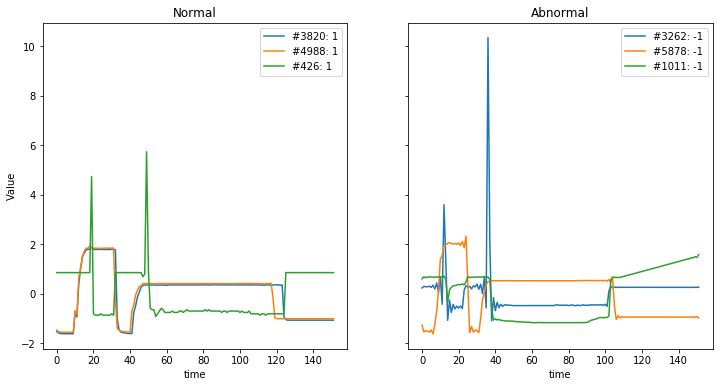

In [6]:
normal_inds = np.argwhere(target == 1) ; np.random.shuffle(normal_inds)
abnormal_inds = np.argwhere(target == -1); np.random.shuffle(abnormal_inds)

num_to_plot = 3
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12,6))

for i in range(num_to_plot):
    ax1.plot(time_series[normal_inds[i][0],:], label=f"#{normal_inds[i][0]}: {target[normal_inds[i][0]]}")
    ax2.plot(time_series[abnormal_inds[i][0],:], label=f"#{abnormal_inds[i][0]}: {target[abnormal_inds[i][0]]}")

ax1.legend()
ax2.legend()
ax1.set_title("Normal") ; ax2.set_title("Abnormal") 
ax1.set_xlabel("time") ; ax2.set_xlabel("time")
ax1.set_ylabel("Value")

What would be good features here?

In [7]:
f1 = np.mean(time_series, axis=1)  # how about the mean?
f1.shape

(7164,)

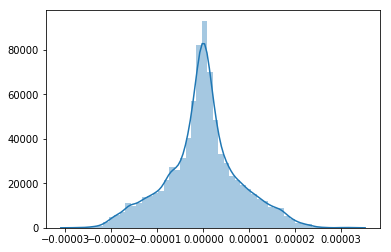

In [8]:
import seaborn as sns, numpy as np
import warnings
warnings.filterwarnings("ignore")

ax = sns.distplot(f1)

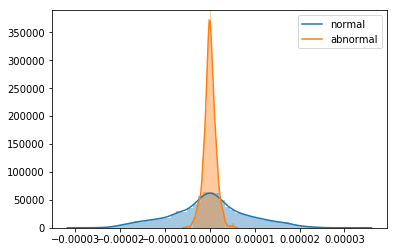

In [9]:
ax = sns.distplot(f1[normal_inds], kde_kws={"label": "normal"})
sns.distplot(f1[abnormal_inds], ax=ax, kde_kws={"label": "abnormal"})

In [10]:
f2 = np.min(time_series, axis=1)  # how about the mean?
f2.shape

(7164,)

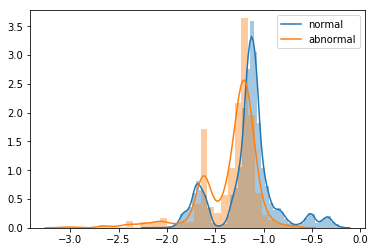

In [11]:
ax = sns.distplot(f2[normal_inds], kde_kws={"label": "normal"})
sns.distplot(f2[abnormal_inds], ax=ax, kde_kws={"label": "abnormal"})

Often there are entire python packages devoted to help us build features from certain types of datasets (timeseries, text, images, movies, etc.). In the case of timeseries, a popular package is `tsfresh` (*"It automatically calculates a large number of time series characteristics, the so called features. Further the package contains methods to evaluate the explaining power and importance of such characteristics for regression or classification tasks."*). See the [tsfresh docs](https://tsfresh.readthedocs.io/en/latest/) and the [list of features generated](https://tsfresh.readthedocs.io/en/latest/text/list_of_features.html).

In [12]:
# !pip install tsfresh

In [13]:
dfc = df.copy()
del dfc[152]
d = dfc.stack()
d = d.reset_index()
d = d.rename(columns={"level_0": "id", "level_1": "time", 0: "value"})
y = df[152]

In [19]:
from tsfresh import extract_features

max_num=300

from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(d[d["id"] < max_num], y.iloc[0:max_num],
                                                     column_id='id', column_sort='time', n_jobs=4)
#extracted_features = extract_features(, column_id="id", 
 #                                                           column_sort="time", disable_progressbar=False, n_jobs=3)

Feature Extraction: 100%|██████████| 10/10 [00:23<00:00,  2.39s/it]
 'value__fft_coefficient__coeff_77__attr_"angle"'
 'value__fft_coefficient__coeff_77__attr_"imag"'
 'value__fft_coefficient__coeff_77__attr_"real"'
 'value__fft_coefficient__coeff_78__attr_"abs"'
 'value__fft_coefficient__coeff_78__attr_"angle"'
 'value__fft_coefficient__coeff_78__attr_"imag"'
 'value__fft_coefficient__coeff_78__attr_"real"'
 'value__fft_coefficient__coeff_79__attr_"abs"'
 'value__fft_coefficient__coeff_79__attr_"angle"'
 'value__fft_coefficient__coeff_79__attr_"imag"'
 'value__fft_coefficient__coeff_79__attr_"real"'
 'value__fft_coefficient__coeff_80__attr_"abs"'
 'value__fft_coefficient__coeff_80__attr_"angle"'
 'value__fft_coefficient__coeff_80__attr_"imag"'
 'value__fft_coefficient__coeff_80__attr_"real"'
 'value__fft_coefficient__coeff_81__attr_"abs"'
 'value__fft_coefficient__coeff_81__attr_"angle"'
 'value__fft_coefficient__coeff_81__attr_"imag"'
 'value__fft_coefficient__coeff_81__attr_"real"'


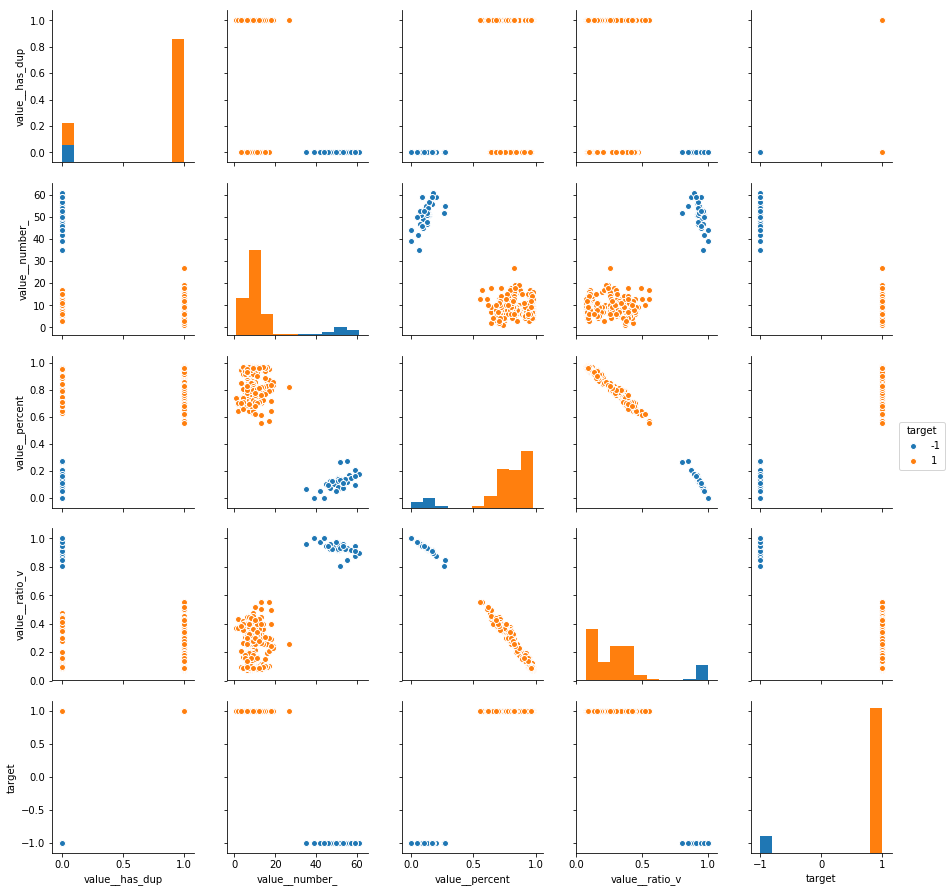

In [45]:
feats = features_filtered_direct[features_filtered_direct.columns[0:4]].rename(lambda x: x[0:14], axis='columns')
feats["target"] = y.iloc[0:max_num]
sns.pairplot(feats, hue="target")

In [51]:
from sklearn.datasets import fetch_20newsgroups
news_train = fetch_20newsgroups(subset='train', categories=['sci.space','rec.autos'], data_home='datatmp/')

INFO:sklearn.datasets.twenty_newsgroups:Downloading 20news dataset. This may take a few minutes.
INFO:sklearn.datasets.twenty_newsgroups:Downloading dataset from https://ndownloader.figshare.com/files/5975967 (14 MB)


In [55]:
news_train.target_names

['rec.autos', 'sci.space']